# Statistical Learning Project Census Data

## Load the Data and Initial Exploration

In [1]:

import pandas as pd

# Load the adult.data file
data_file_path = 'census+income/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data_df = pd.read_csv(data_file_path, names=columns, sep=',\s', na_values="?", engine='python')

# Display the first few rows of the dataset
data_df.head(7)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


*   It contains 15 columns, including demographic, work-related, and income information.
*   The columns are: `age`, `workclass`, `fnlwgt` (final weight), `education`, `education_num` (education number), `marital_status`, `occupation`, `relationship`, `race`, `sex`, `capital_gain`, `capital_loss`, `hours_per_week`, `native_country`, and `income`.
*   The `income` column, which is likely the target variable for predictive modeling, classifies individuals into two groups: `<=50K` and `>50K`.

In [2]:
# Load the adult.test file
test_file_path =  'census+income/adult.test'
# Skipping the first row as it might be a header or descriptive row based on common dataset patterns
test_df = pd.read_csv(test_file_path, names=columns, sep=',\s', na_values="?", engine='python', skiprows=1)

# Display the first few rows of the test dataset
test_df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


*   The `income` column values in the test dataset include a period (`.`) at the end (e.g., `<=50K.`, `>50K.`), unlike in the training dataset. This will need to be cleaned to ensure consistency between the two datasets.
*   There are missing values (`NaN`) in some columns, such as `workclass` and `occupation`, indicating that handling missing data will be an important part of the preprocessing.

## Data Cleaning and Preprocessing

Preliminary Analysis

In [3]:
# Summary statistics before cleaning and preprocessing
total_records = data_df.shape[0]
total_features = data_df.shape[1]
individuals_more_than_50k = data_df[data_df['income'] == '>50K'].shape[0]
individuals_at_most_50k = data_df[data_df['income'] == '<=50K'].shape[0]
percentage_more_than_50k = (individuals_more_than_50k / total_records) * 100

summary_before_cleaning = {
    "Total number of records": total_records,
    "Total number of features": total_features,
    "Individuals making more than $50k": individuals_more_than_50k,
    "Individuals making at most $50k": individuals_at_most_50k,
    "Percentage of individuals making more than $50k": percentage_more_than_50k,
}

summary_before_cleaning


{'Total number of records': 32561,
 'Total number of features': 15,
 'Individuals making more than $50k': 7841,
 'Individuals making at most $50k': 24720,
 'Percentage of individuals making more than $50k': 24.080955744602438}

In [4]:
# Step 2: Identify and Drop Unnecessary Columns
# Re-checking if 'education' column exists before attempting to drop
if 'education' in data_df.columns:
    data_df = data_df.drop(columns=['education'])
if 'education' in test_df.columns:
    test_df = test_df.drop(columns=['education'])

# Step 3: Remove Duplicates
data_df = data_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# Step 4: Make Easier Access for Data by Dropping Spaces
data_df_dropped = data_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
test_df_dropped = test_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Step 5: Change Special Characters
# Making income column values consistent by removing periods
data_df['income'] = data_df_dropped['income'].str.replace('.', '')
test_df['income'] = test_df_dropped['income'].str.replace('.', '')



C:\Users\sapsh\AppData\Local\Temp\ipykernel_1764\727710006.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_df['income'] = data_df_dropped['income'].str.replace('.', '')
C:\Users\sapsh\AppData\Local\Temp\ipykernel_1764\727710006.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_df['income'] = test_df_dropped['income'].str.replace('.', '')


*   Total number of records: 32,537
*   Total number of features: 14 (after removing `education`)
*   Individuals making more than $50k: 7,839
*   Individuals making at most $50k: 24,698
*   Percentage of individuals making more than $50k: 24.09%

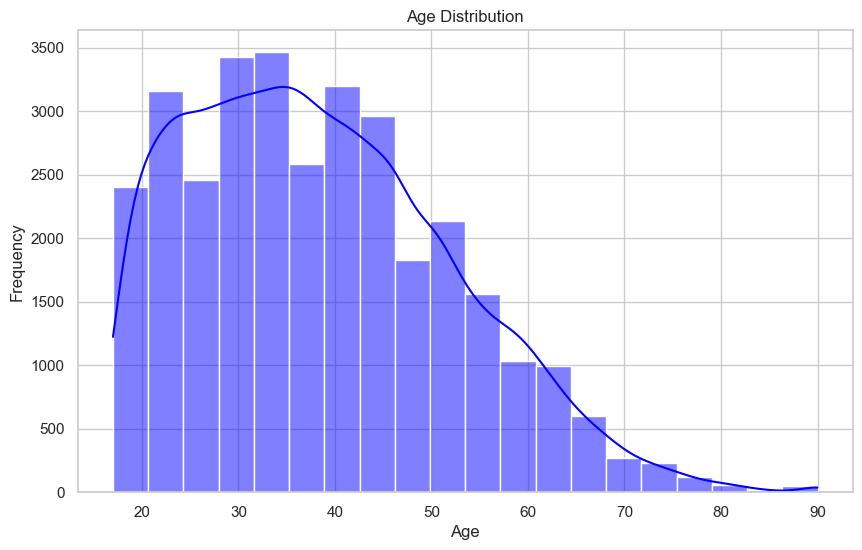

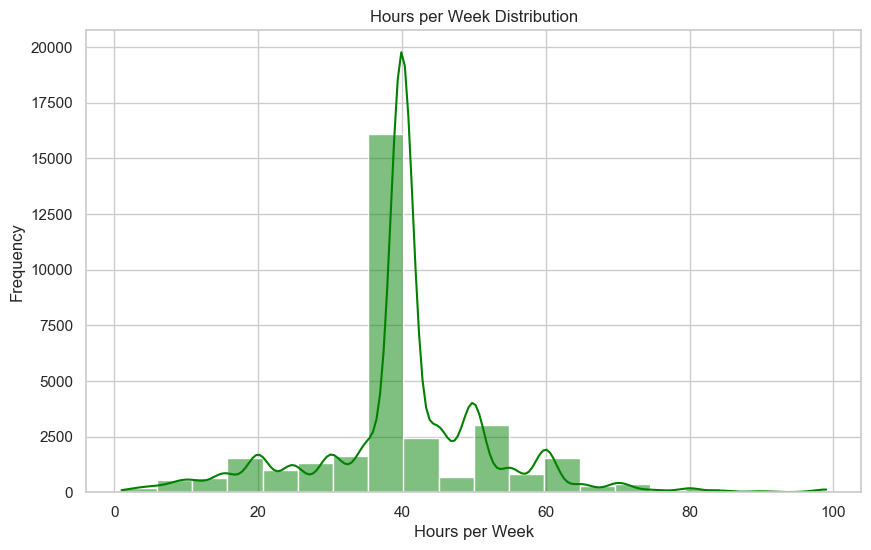

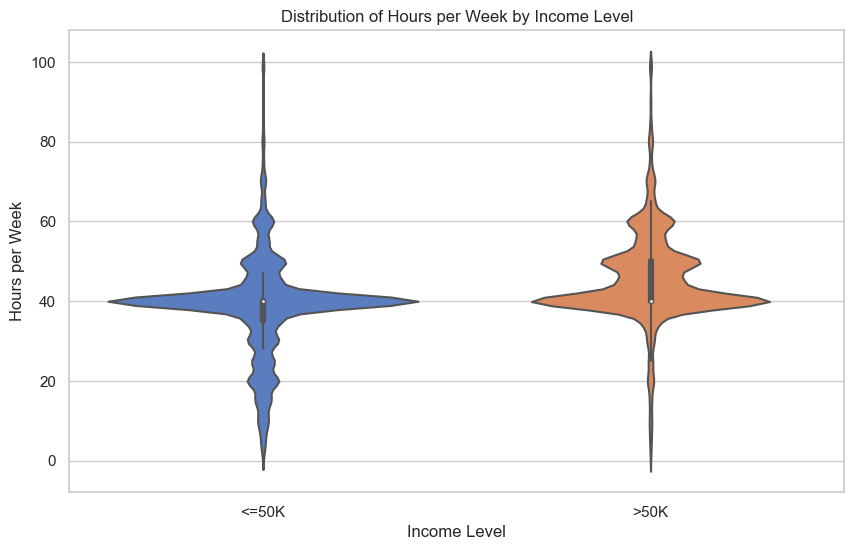

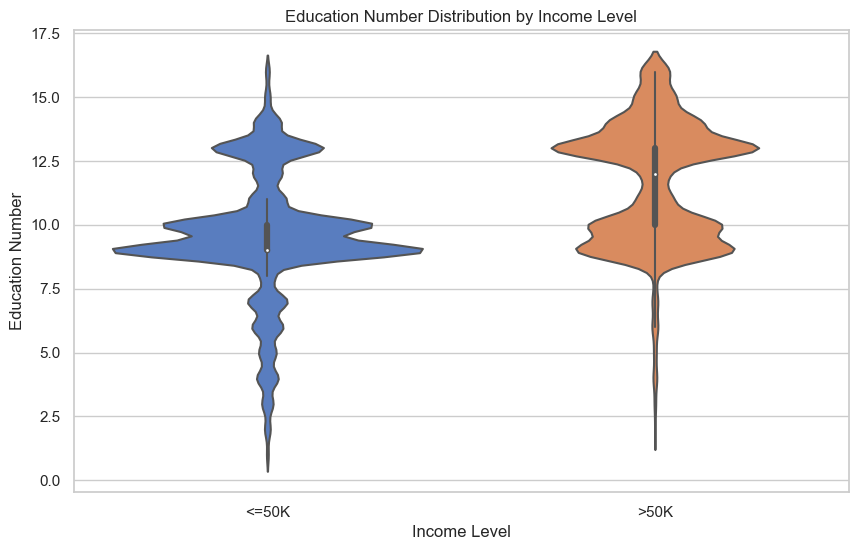

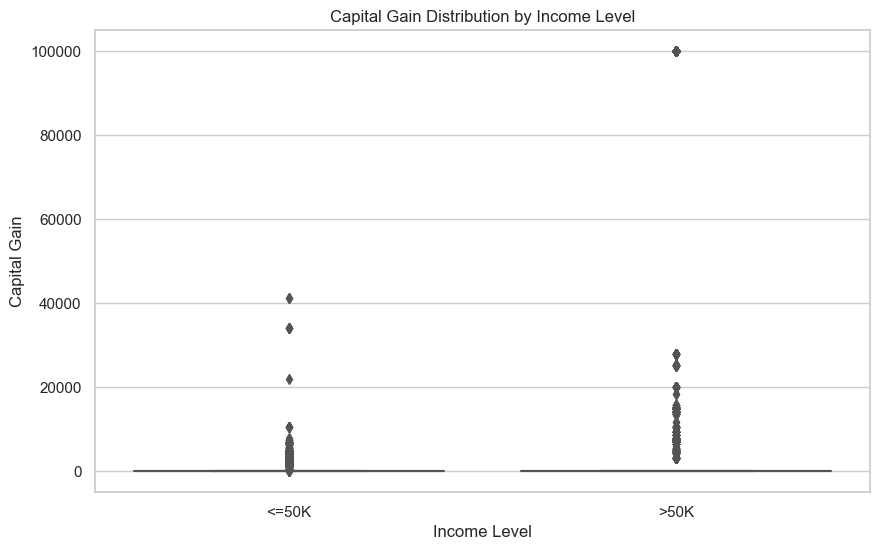

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Histogram of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#  Histogram for Hours per Week
plt.figure(figsize=(10, 6))
sns.histplot(data_df['hours_per_week'], bins=20, kde=True, color='green')
plt.title('Hours per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()


# 2. Violin Plot for hours per week across different income levels
plt.figure(figsize=(10, 6))
sns.violinplot(x='income', y='hours_per_week', data=data_df, palette='muted')
plt.title('Distribution of Hours per Week by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Hours per Week')
plt.show()

#  Violin Plot for Education Num vs. Income
plt.figure(figsize=(10, 6))
sns.violinplot(x='income', y='education_num', data=data_df, palette='muted')
plt.title('Education Number Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Education Number')
plt.show()

# 3. Side-by-side Box Plot for capital gain across income levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital_gain', data=data_df, palette='muted')
plt.title('Capital Gain Distribution by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Capital Gain')
plt.show()


*   **Age Distribution**: The histogram shows the distribution of ages within the dataset, revealing a right-skewed pattern where a majority of the individuals are younger (20-40 years old).
    
*   **Distribution of Hours per Week by Income Level**: The violin plot illustrates the distribution of hours worked per week, segmented by income level. It indicates that individuals making more than $50k tend to work more hours, with a median close to the full-time workweek (40 hours). The distribution for those making at most $50k is slightly wider, suggesting a broader range of work hours.
    
*   **Capital Gain Distribution by Income Level**: The box plot for capital gain across income levels shows a significant presence of outliers, particularly among individuals earning more than $50k. This suggests that capital gain might be a distinguishing feature between the two income groups, though the majority of individuals in both groups have no or very low capital gain.
*   **Hours per Week Distribution**: This histogram shows a strong peak around the 40-hour mark, indicative of a standard full-time work week, with tails extending towards both lower and higher hours. There's a significant concentration of individuals working standard full-time hours, but also a notable portion working fewer or more hours.
    
*   **Education Number Distribution by Income Level**: The violin plot illustrates the distribution of education levels (as measured by the number of years of education) across different income levels. It's evident that individuals with higher education levels tend to be more concentrated in the higher income bracket (`>50K`), suggesting a positive correlation between education and income.



In [6]:
# Identifying numerical and categorical columns
numerical_cols = data_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data_df.select_dtypes(include=['object']).columns.drop('income')

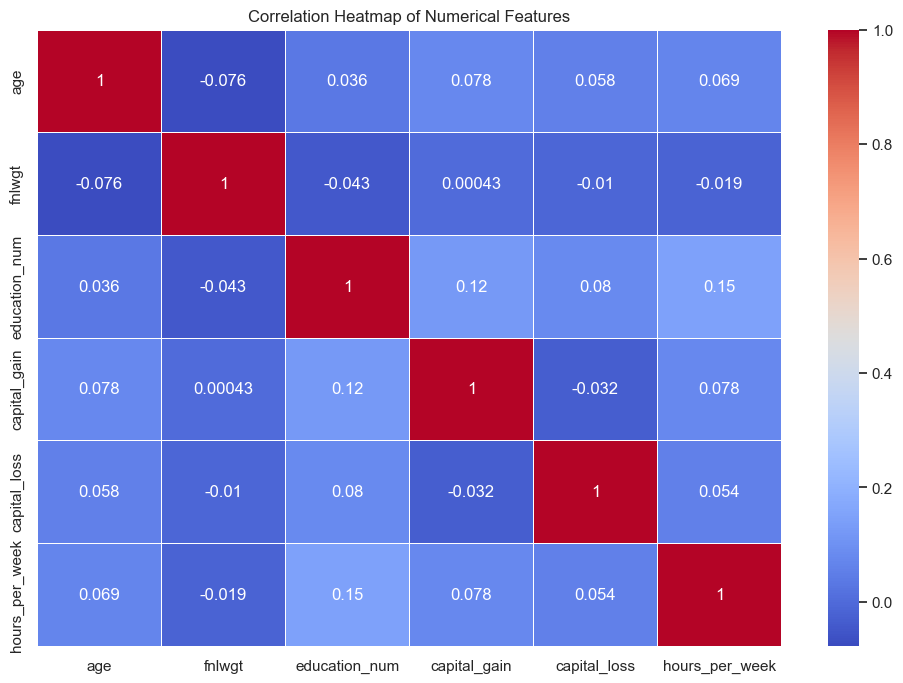

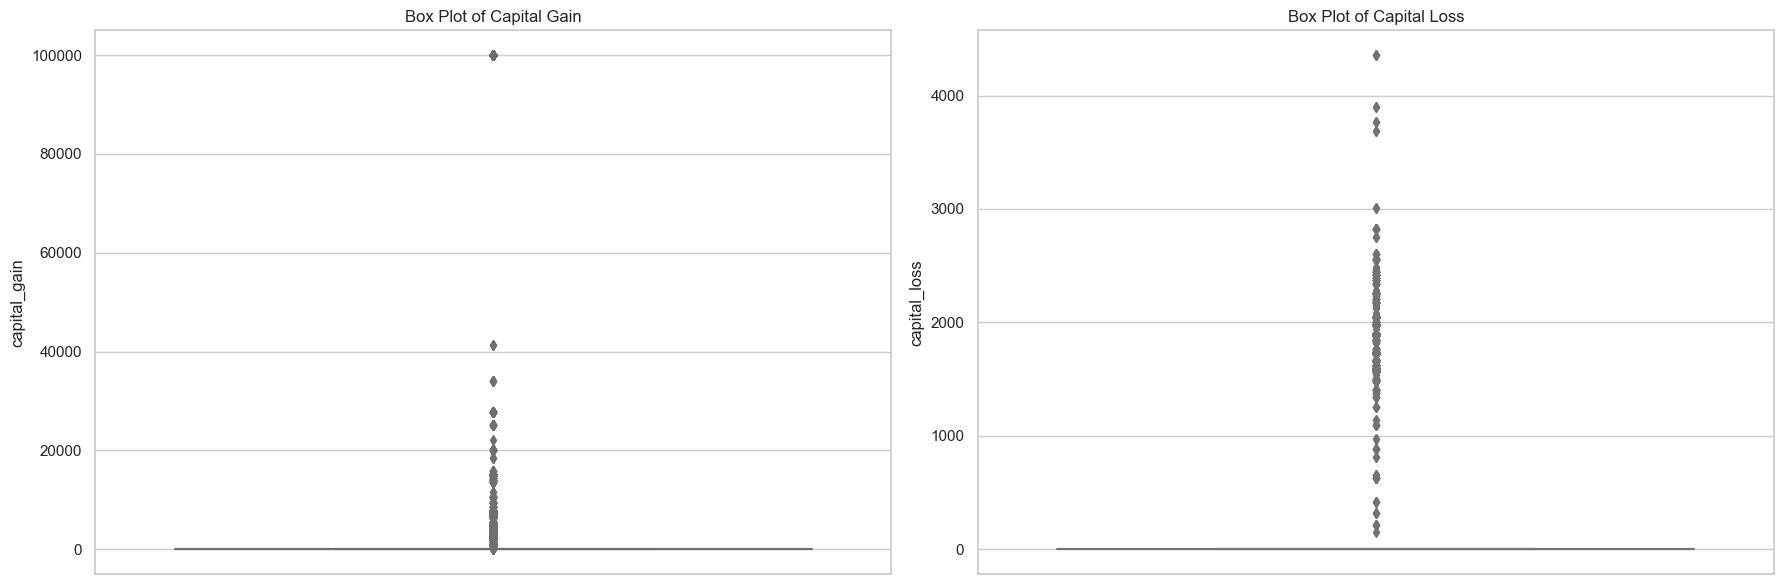

In [7]:
# Heatmap for Correlation Check among numerical features
correlation_matrix = data_df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Box Plot for Capital Gain and Capital Loss to check for outliers
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=data_df, y='capital_gain', ax=ax[0], color='skyblue')
ax[0].set_title('Box Plot of Capital Gain')

sns.boxplot(data=data_df, y='capital_loss', ax=ax[1], color='lightgreen')
ax[1].set_title('Box Plot of Capital Loss')

plt.tight_layout()
plt.show()


### Correlation Heatmap:

*   The heatmap shows the correlations among numerical features. Most features have low to moderate correlations with each other, suggesting minimal multicollinearity issues for models that assume independence between features. Notably, `education_num` shows some level of positive correlation with `age`, which could indicate that higher educational attainment is associated with older age groups within this dataset.

### Box Plots for Capital Gain and Capital Loss:

*   **Capital Gain**: The box plot reveals a significant number of outliers, with the bulk of data concentrated at 0. This indicates that capital gains are not common among most individuals in the dataset, but when they do occur, they can vary greatly in amount.
*   **Capital Loss**: Similar to capital gain, most individuals have no capital loss (`capital_loss` = 0), but there are outliers with varying amounts of loss

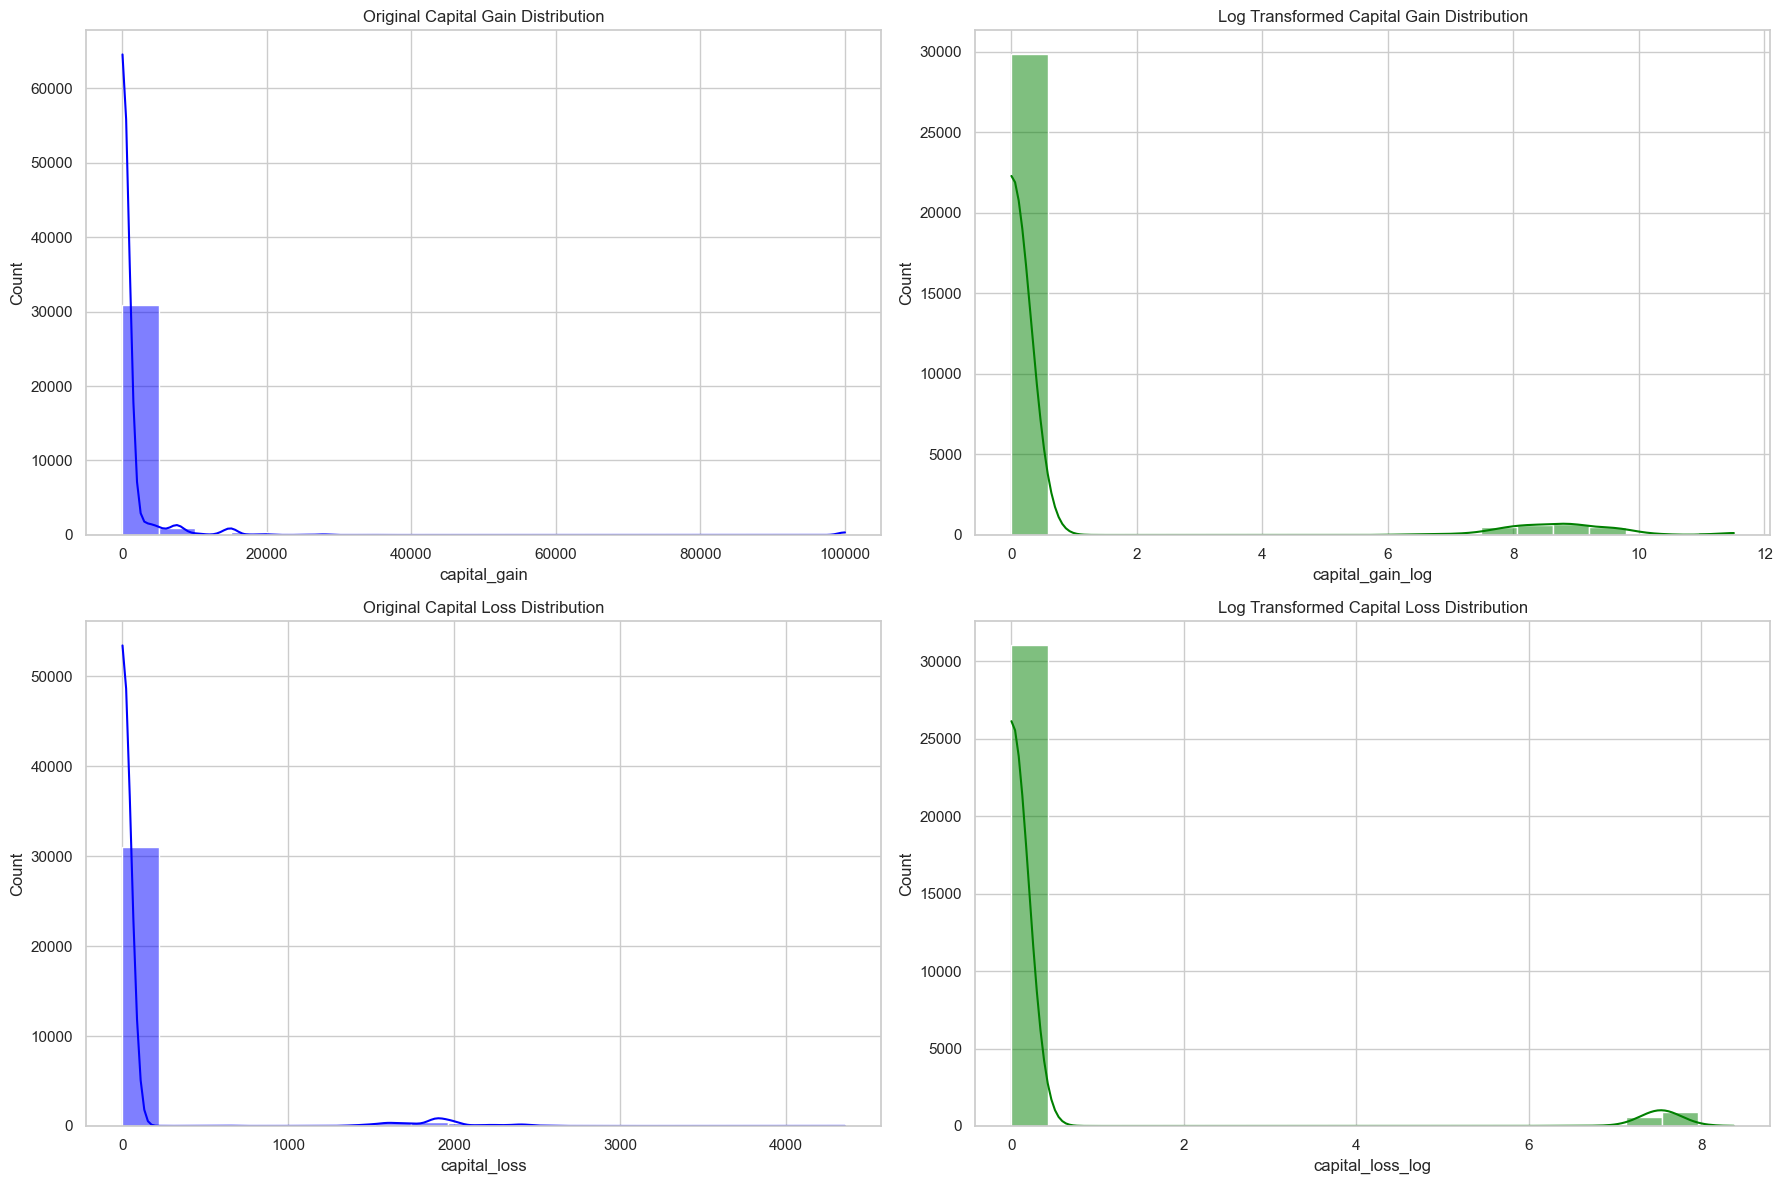

In [8]:
import numpy as np

# Applying log transformation to 'capital_gain' and 'capital_loss' by adding 1 to avoid log(0)
data_df['capital_gain_log'] = np.log(data_df['capital_gain'] + 1)
data_df['capital_loss_log'] = np.log(data_df['capital_loss'] + 1)

test_df['capital_gain_log'] = np.log(test_df['capital_gain'] + 1)
test_df['capital_loss_log'] = np.log(test_df['capital_loss'] + 1)

# Visualizing the transformed features to see the effect of the log transformation
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Original capital_gain distribution
sns.histplot(data_df['capital_gain'], bins=20, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Original Capital Gain Distribution')

# Transformed capital_gain_log distribution
sns.histplot(data_df['capital_gain_log'], bins=20, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Log Transformed Capital Gain Distribution')

# Original capital_loss distribution
sns.histplot(data_df['capital_loss'], bins=20, kde=True, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Original Capital Loss Distribution')

# Transformed capital_loss_log distribution
sns.histplot(data_df['capital_loss_log'], bins=20, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Log Transformed Capital Loss Distribution')

plt.tight_layout()
plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Creating transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Since high cardinality handling requires specific knowledge of which features are considered high cardinality,
# let's initially treat all categorical features with OneHotEncoder for simplicity
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fitting the ColumnTransformer to the training data
preprocessor.fit(data_df.drop('income', axis=1))  # Exclude target variable for fitting

# Transforming both training and test set
data_df_t = preprocessor.transform(data_df.drop('income', axis=1))
test_df_t = preprocessor.transform(test_df.drop('income', axis=1))

# The transformed data is now in a NumPy array format. To visualize and further process.


data_df_t.shape, test_df_t.shape


((32537, 89), (16276, 89))

The data has been successfully scaled and encoded, resulting in the following transformations:

*   The training set (`adult.data`) has been transformed into a format with 32,537 rows and 89 features after preprocessing.
*   The test set (`adult.test`) now aligns with the training set, having been transformed to have 16,276 rows and 89 features.

In [10]:
# Identifying outliers using the IQR method for selected numerical features
features_to_check = ['age', 'fnlwgt', 'education_num', 'capital_gain_log', 'capital_loss_log']
outlier_indices = []

for feature in features_to_check:
    Q1 = data_df[feature].quantile(0.25)
    Q3 = data_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_list = data_df[(data_df[feature] < (Q1 - 1.5 * IQR)) | (data_df[feature] > (Q3 + 1.5 * IQR))].index
    outlier_indices.extend(outlier_list)

# Identifying unique indices that were flagged as outliers in any of the features
outlier_indices = list(set(outlier_indices))

# Reporting the number of outliers detected
len(outlier_indices), len(outlier_indices) / data_df.shape[0] * 100


(6247, 19.199680363893414)

Outlier detection has revealed that 6,247 data points, or approximately 19.2% of the dataset, were identified as outliers in at least one of the selected numerical features (`age`, `fnlwgt`, `education_num`, `capital_gain_log`, `capital_loss_log`).

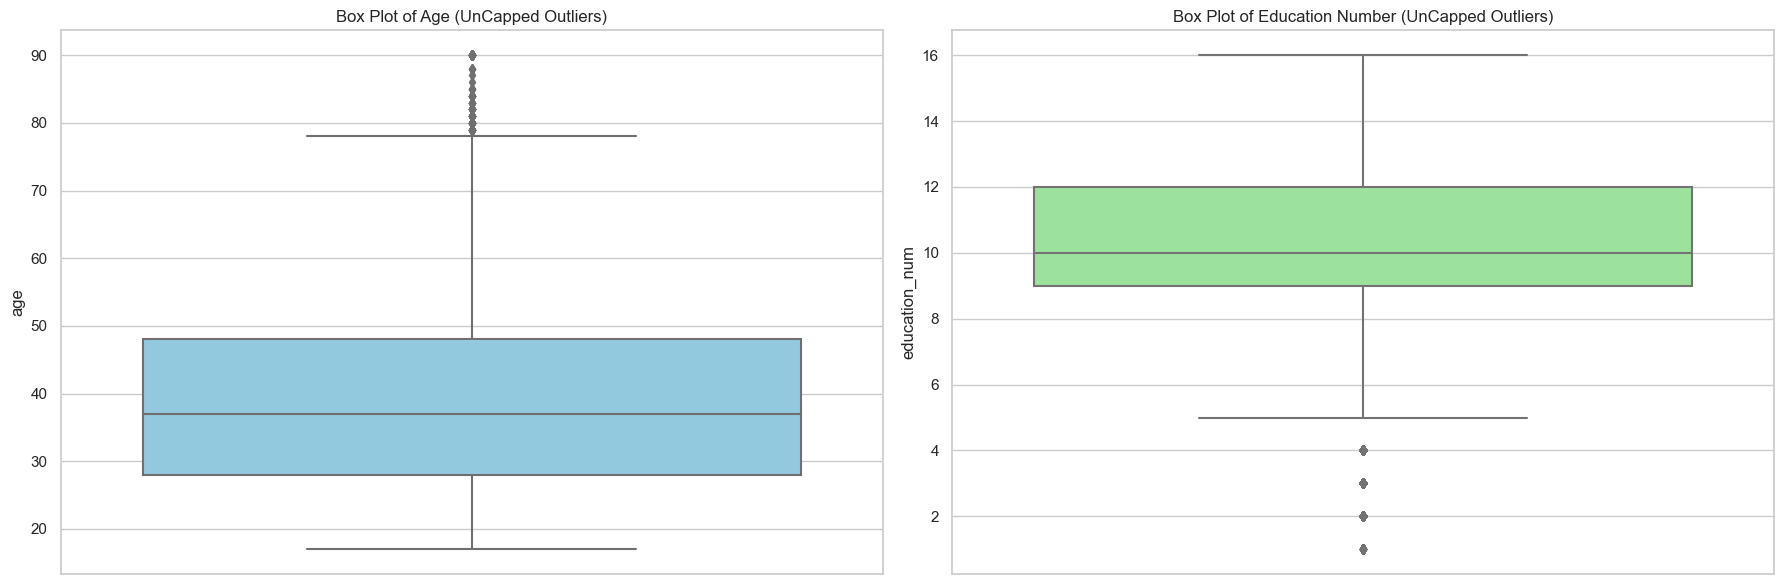

In [11]:
# Displaying box plots for the capped features to verify before outlier treatment
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=data_df, y='age', ax=ax[0], color='skyblue')
ax[0].set_title('Box Plot of Age (UnCapped Outliers)')

sns.boxplot(data=data_df, y='education_num', ax=ax[1], color='lightgreen')
ax[1].set_title('Box Plot of Education Number (UnCapped Outliers)')

plt.tight_layout()
plt.show()

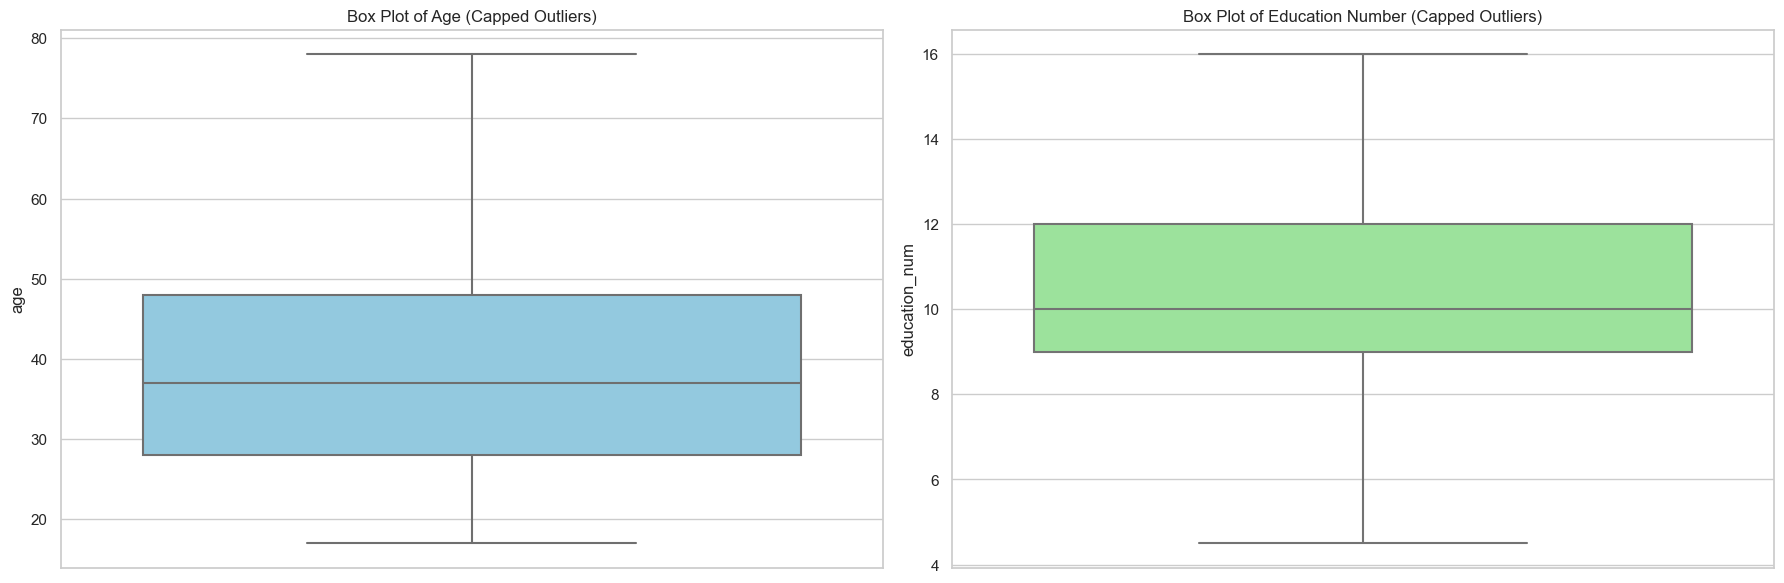

In [12]:
# Function to cap outliers based on the IQR method
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
    return df

# Capping outliers for 'age' and 'education_num'
data_df = cap_outliers(data_df, 'age')
data_df = cap_outliers(data_df, 'education_num')

# Repeating the process for the test dataset to maintain consistency
test_df = cap_outliers(test_df, 'age')
test_df = cap_outliers(test_df, 'education_num')

# Displaying box plots for the capped features to verify the effect of outlier treatment
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(data=data_df, y='age', ax=ax[0], color='skyblue')
ax[0].set_title('Box Plot of Age (Capped Outliers)')

sns.boxplot(data=data_df, y='education_num', ax=ax[1], color='lightgreen')
ax[1].set_title('Box Plot of Education Number (Capped Outliers)')

plt.tight_layout()
plt.show()


The box plots for `age` and `education_num` after capping outliers show that the extreme values have been adjusted to within the defined thresholds, effectively mitigating the impact of outliers in these features. This treatment retains the data points while reducing the potential distortion caused by extreme values in the dataset.

## Checking and Handling Class Imbalance

Before proceeding with model building, it's crucial to ensure that the classes in the target variable are balanced. Class imbalance can lead to a model biased towards the majority class, hence affecting the overall model performance, especially on the minority class. Below, we check the distribution of the classes and apply resampling techniques if necessary to balance the dataset.


In [13]:
# Display the initial class distribution
class_counts = data_df['income'].value_counts()
print("Class Distribution before Resampling:", class_counts)


Class Distribution before Resampling: <=50K    24698
>50K      7839
Name: income, dtype: int64


### Resampling to Handle Imbalance

If an imbalance is detected, we will use the resampling technique to adjust the class distribution. This step involves oversampling the minority class by replicating its samples until both classes have an equal number of instances.


In [14]:
from sklearn.utils import resample

# Check if resampling is necessary based on a simple 50% threshold of the smallest class to the largest class
if min(class_counts) / max(class_counts) < 0.5:  # Adjust this threshold based on your specific needs
    # Identifying the majority and minority classes
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()

    # Separating the majority and minority data
    df_majority = data_df[data_df['income'] == majority_class]
    df_minority = data_df[data_df['income'] == minority_class]

    # Upsampling the minority class
    df_minority_upsampled = resample(df_minority,
                                     replace=True,     # Sample with replacement
                                     n_samples=len(df_majority),  # to match the majority class
                                     random_state=123) # For reproducibility

    # Combine the upsampled minority class with the majority class
    data_df = pd.concat([df_majority, df_minority_upsampled])

    # Display new class distribution
    new_class_counts = data_df['income'].value_counts()
    print("Class Distribution after Resampling:", new_class_counts)
else:
    print("No resampling needed, class distribution is relatively balanced.")


Class Distribution after Resampling: <=50K    24698
>50K     24698
Name: income, dtype: int64


Now that the dataset is balanced, we can proceed to the next steps of our analysis, ensuring that our model's learning is not biased towards the majority class. This ensures a more accurate and fair evaluation of the model's performance across different class labels.


## Logistic Regression Model Implementation

We will implement a basic logistic regression using only Python and NumPy. This includes writing our own functions for the sigmoid activation, cost computation, and the gradient descent optimization.


In [15]:
# Check the data types of all columns in the dataframe
data_df_lg = data_df
test_df_lg = test_df

data_types = data_df_lg.dtypes
print("Data Types of Each Column:")
print(data_types)

# Optionally, check for non-numeric data types specifically
non_numeric_columns = data_df_lg.select_dtypes(exclude=[np.number]).columns
test_numeric_columns = test_df_lg.select_dtypes(exclude=[np.number]).columns

if len(non_numeric_columns) > 0:
    print("\nNon-Numeric Columns Found:")
    print(non_numeric_columns)
    print(test_numeric_columns)
else:
    print("\nAll columns are numeric.")


Data Types of Each Column:
age                 float64
workclass            object
fnlwgt                int64
education_num       float64
marital_status       object
occupation           object
relationship         object
race                 object
sex                  object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
native_country       object
income               object
capital_gain_log    float64
capital_loss_log    float64
dtype: object

Non-Numeric Columns Found:
Index(['workclass', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'native_country', 'income'],
      dtype='object')
Index(['workclass', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'native_country', 'income'],
      dtype='object')


In [16]:
# Assuming 'income' is your target variable and should not be encoded
# Select only the columns that are not the target
features_df = data_df_lg.drop('income', axis=1)
test_features = test_df_lg.drop('income', axis=1)

# Apply one-hot encoding to non-numeric columns
features_df = pd.get_dummies(features_df, drop_first=True)  # drop_first=True to avoid multicollinearity
test_features = pd.get_dummies(test_features, drop_first=True)

# Combine the one-hot encoded features with the target variable 'income'
encoded_data_df = pd.concat([features_df, data_df_lg['income']], axis=1)
encoded_test_df = pd.concat([test_features, test_df_lg['income']], axis=1)

# Display the new dataframe with encoded features
print("Dataframe after one-hot encoding non-numeric features:")
print(encoded_data_df.head())

# Optionally, you can check the new data types to ensure all are now numeric
print("\nNew Data Types of Each Column:")
print(encoded_data_df.dtypes)


Dataframe after one-hot encoding non-numeric features:
    age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0  39.0   77516           13.0          2174             0              40   
1  50.0   83311           13.0             0             0              13   
2  38.0  215646            9.0             0             0              40   
3  53.0  234721            7.0             0             0              40   
4  28.0  338409           13.0             0             0              40   

   capital_gain_log  capital_loss_log  workclass_Local-gov  \
0          7.684784               0.0                    0   
1          0.000000               0.0                    0   
2          0.000000               0.0                    0   
3          0.000000               0.0                    0   
4          0.000000               0.0                    0   

   workclass_Never-worked  ...  native_country_Puerto-Rico  \
0                       0  ...           

In [17]:
# Check the data types of all columns in the dataframe
data_types = encoded_data_df.dtypes
print("Data Types of Each Column:")
print(data_types)
# Optionally, check for non-numeric data types specifically
non_numeric_columns = encoded_data_df.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_columns) > 0:
    print("\nNon-Numeric Columns Found:")
    print(non_numeric_columns)
else:
    print("\nAll columns are numeric.")

Data Types of Each Column:
age                               float64
fnlwgt                              int64
education_num                     float64
capital_gain                        int64
capital_loss                        int64
                                   ...   
native_country_Trinadad&Tobago      uint8
native_country_United-States        uint8
native_country_Vietnam              uint8
native_country_Yugoslavia           uint8
income                             object
Length: 85, dtype: object

Non-Numeric Columns Found:
Index(['income'], dtype='object')


In [18]:
# Convert 'income' using a mapping
income_mapping = {'<=50K': 0, '>50K': 1}
encoded_data_df['income'] = encoded_data_df['income'].map(income_mapping)
encoded_test_df['income'] = encoded_test_df['income'].map(income_mapping)

In [19]:
set(encoded_data_df.columns) - set(encoded_test_df.columns)

{'native_country_Holand-Netherlands'}

In [20]:
missing_columns = set(encoded_data_df.columns) - set(encoded_test_df.columns)
for column in missing_columns:
    encoded_test_df[column] = 0

# Reorder columns in test to match train
test_encoded = encoded_test_df[encoded_data_df.columns]
set(encoded_data_df.columns) - set(encoded_test_df.columns)

set()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-6, regularization=None, lambda_=0.1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.weights = None
        self.regularization = regularization
        self.lambda_ = lambda_
        self.cost_history = []

    def add_intercept(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def normalize(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return (X - self.mean) / self.std

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = len(y)
        predictions = self.sigmoid(np.dot(X, self.weights))
        epsilon = 1e-5
        cost = -1/m * np.sum(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions + epsilon))
        if self.regularization == 'l2':
            cost += (self.lambda_ / (2 * m)) * np.sum(np.square(self.weights))
        elif self.regularization == 'l1':
            cost += (self.lambda_ / m) * np.sum(np.abs(self.weights))
        return cost

    def gradient(self, X, y):
        predictions = self.sigmoid(np.dot(X, self.weights))
        gradient = np.dot(X.T, (predictions - y)) / len(y)
        if self.regularization == 'l2':
            gradient += (self.lambda_ / len(y)) * self.weights
        elif self.regularization == 'l1':
            gradient += (self.lambda_ / len(y)) * np.sign(self.weights)
        return gradient

    def fit(self, X, y):
        X_normalized = self.normalize(X)
        X_with_intercept = self.add_intercept(X_normalized)
        self.weights = np.zeros(X_with_intercept.shape[1])
        self.prev_cost = float('inf')

        for i in tqdm(range(self.max_iter)):
            gradient = self.gradient(X_with_intercept, y)
            self.weights -= self.learning_rate * gradient
            cost = self.compute_cost(X_with_intercept, y)
            self.cost_history.append(cost)
            if i > 0 and abs(self.prev_cost - cost) < self.tol:
                break
            self.prev_cost = cost

    def predict_proba(self, X):
        X_normalized = (X - self.mean) / self.std
        X_with_intercept = self.add_intercept(X_normalized)
        probabilities = self.sigmoid(np.dot(X_with_intercept, self.weights))
        return probabilities

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1) if np.sum(y_pred == 1) > 0 else 0
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1) if np.sum(y == 1) > 0 else 0
        return accuracy, precision, recall

    def plot_learning_curve(self):
        """ Plot the learning curve (cost vs iteration). """
        plt.figure(figsize=(10, 6))
        plt.plot(np.arange(len(self.cost_history)), self.cost_history, label='Cost')
        plt.title('Learning Curve')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.legend()
        plt.show()

In [22]:
import numpy as np

def train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Splits data into training and test sets.
    X: feature dataset (numpy array)
    y: target dataset (numpy array)
    test_size: proportion of the dataset to include in the test split (float)
    random_state: seed for the random number generator (int)
    """
    if random_state:
        np.random.seed(random_state)

    # Shuffle the data indices
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    # Calculate the number of test samples
    test_samples = int(X.shape[0] * test_size)

    # Split indices into training and test indices
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]

    # Create train-test splits
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


### Model Training and Evaluation

We will now train our logistic regression model on the preprocessed dataset and evaluate its performance using accuracy, precision, and recall metrics. Additionally, we will visualize the learning curve to observe the convergence behavior.


In [23]:
X = encoded_data_df.drop('income', axis=1).values
y = encoded_data_df['income'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
model = LogisticRegression(learning_rate=0.01, max_iter=1000, regularization='l2', lambda_=0.1)
model.fit(X_train, y_train)

100%|██████████| 1000/1000 [00:23<00:00, 43.11it/s]


In [25]:
accuracy, precision, recall = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")


Validation Accuracy: 0.8047373215912542, Precision: 0.784635711589279, Recall: 0.8406471183013144


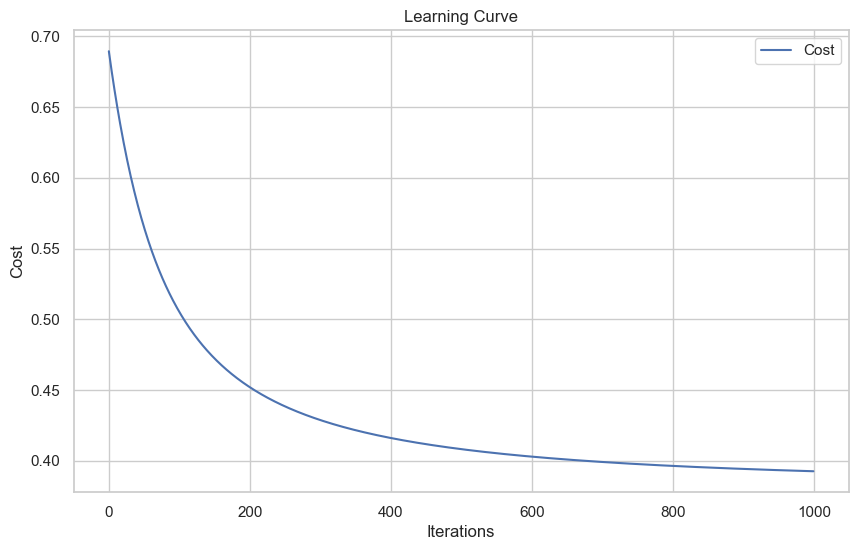

In [26]:
# Plotting the learning curve
model.plot_learning_curve()

In [27]:
X_final_test = encoded_test_df.drop('income', axis=1).values
y_final_test = encoded_test_df['income'].values
final_accuracy, final_precision, final_recall = model.evaluate(X_final_test, y_final_test)
print(f"Final Test - Accuracy: {final_accuracy}, Precision: {final_precision}, Recall: {final_recall}")

Final Test - Accuracy: 0.8301794052592775, Precision: 0.61750651607298, Recall: 0.7392095683827353


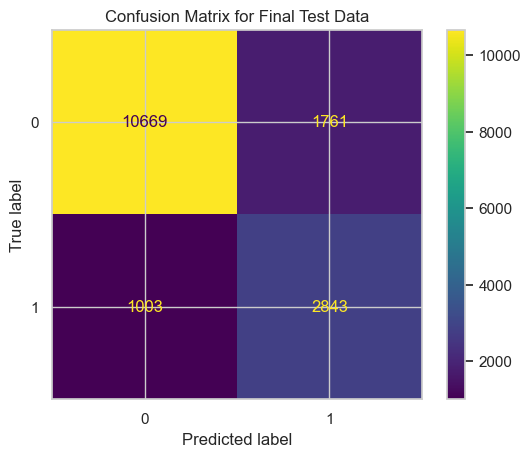

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_final = model.predict(X_final_test)
cm = confusion_matrix(y_final_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Final Test Data')
plt.show()


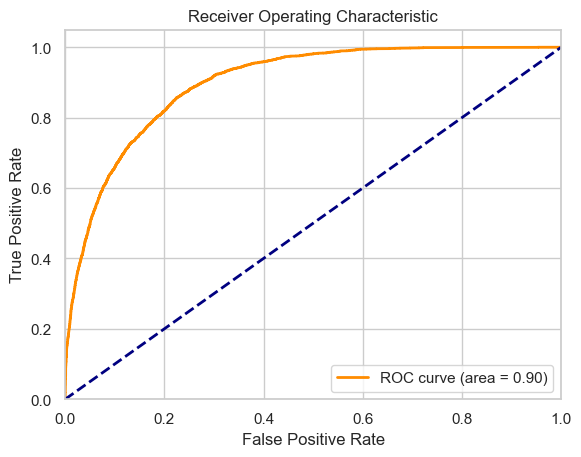

In [29]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_final_test, model.predict_proba(X_final_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_final_test, y_pred_final, target_names=['<=50K', '>50K']))


              precision    recall  f1-score   support

       <=50K       0.91      0.86      0.89     12430
        >50K       0.62      0.74      0.67      3846

    accuracy                           0.83     16276
   macro avg       0.77      0.80      0.78     16276
weighted avg       0.84      0.83      0.84     16276



## Gaussian Naive Model Implementation

In [31]:
data_df_gnb = data_df
test_df_gnb = test_df


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc


In [33]:
def prepare_and_visualize(data):
    plt.figure(figsize=(15, 10))
    numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
    for i, feature in enumerate(numeric_features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[feature], kde=True, element='step', stat="density", linewidth=0)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

    features = data.select_dtypes(include=['int64', 'float64']).columns.drop(['capital_gain', 'capital_loss'])
    X = data[features]
    y = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
    scaler = StandardScaler()
    X_norm = scaler.fit_transform(X)
    return X_norm, y, scaler




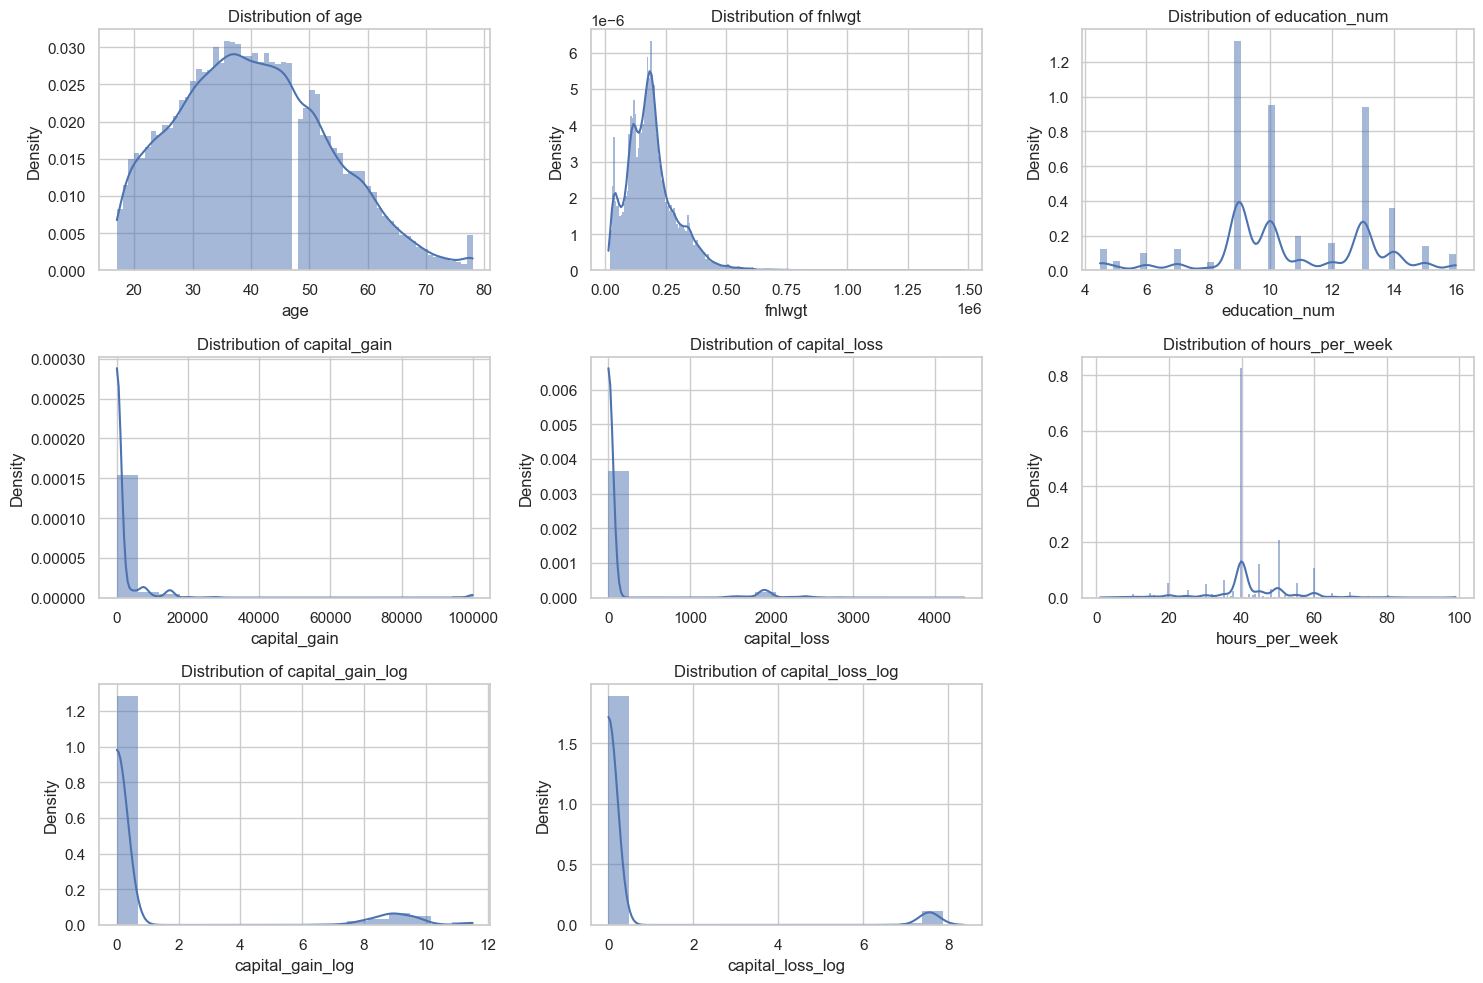

In [34]:
X_train_norm, y_train, scaler = prepare_and_visualize(data_df_gnb)
X_train, X_val, y_train, y_val = train_test_split(X_train_norm, y_train, test_size=0.3, random_state=1)

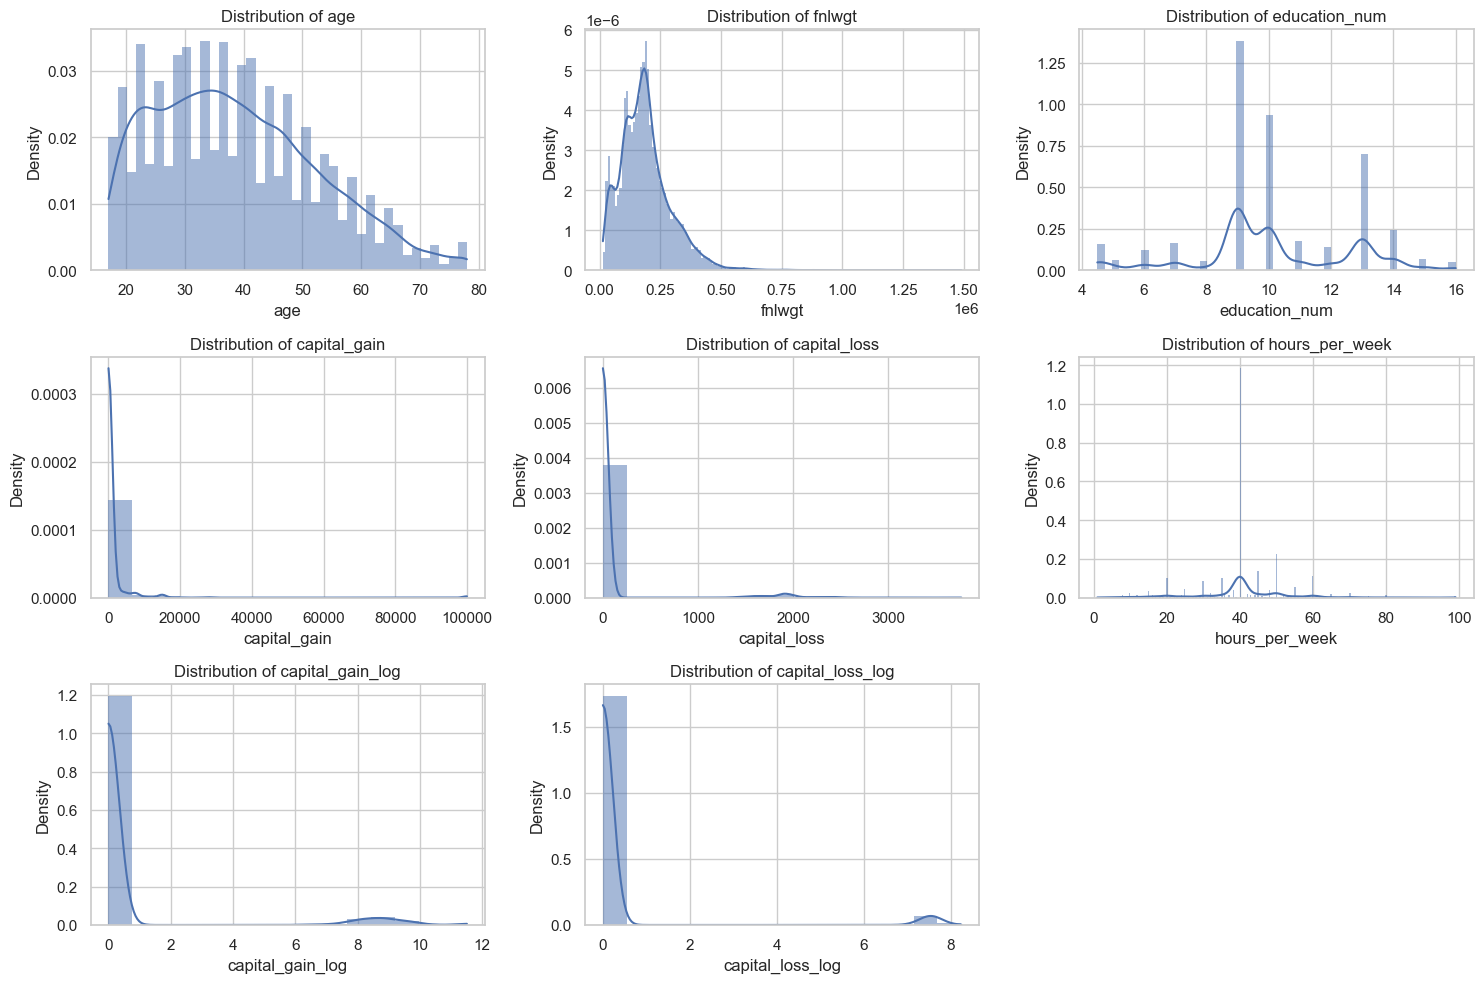

In [35]:
X_test_norm , y_test , scaler = prepare_and_visualize(test_df_gnb)

In [36]:
print("Data shapes after split:")
print("Train shape:", X_train_norm.shape)
print("Test shape:", X_test_norm.shape)

Data shapes after split:
Train shape: (49396, 6)
Test shape: (16276, 6)


In [37]:
class GaussianNaiveBayes:
    def __init__(self):
        self.class_summary = {}

    def summarize_class(self, X, y):
        for cls in np.unique(y):
            self.class_summary[cls] = {
                'mean': X[y == cls].mean(axis=0),
                'std': X[y == cls].std(axis=0),
                'prior': np.mean(y == cls)
            }

    def fit(self, X, y):
        self.summarize_class(X, y)

    def calculate_probability(self, x, mean, std):
        std = np.where(std == 0, 1e-8, std)
        exponent = np.exp(-((x - mean) ** 2 / (2 * std ** 2)))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

    def predict_proba(self, X):
        rows = X.shape[0]
        probs = np.zeros((rows, len(self.class_summary)))
        for cls, cls_summary in self.class_summary.items():
            prior = cls_summary['prior']
            individual_probs = self.calculate_probability(X, cls_summary['mean'], cls_summary['std'])
            probs[:, cls] = np.log(prior) + np.sum(np.log(individual_probs), axis=1)
        return np.exp(probs)

    def predict(self, X):
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)

    def evaluate(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

In [38]:
nb_model = GaussianNaiveBayes()
nb_model.fit(X_train, y_train)


In [39]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = model.evaluate(X_train, y_train)
    test_acc = model.evaluate(X_test, y_test)

    print("Training Accuracy: {:.2f}%".format(100 * model.evaluate(X_train, y_train)))
    print("Testing Accuracy: {:.2f}%".format(100 * model.evaluate(X_test, y_test)))
    print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
    print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred))
    print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
    print("\nTesting Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
# ROC Curve for Test Set
    if hasattr(model, 'predict_proba'):
        y_test_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_test_scores)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic for Test Set')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Model does not support probability predictions, cannot plot ROC curve.")



Training Accuracy: 67.95%
Testing Accuracy: 79.10%

Training Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.90      0.74     17190
           1       0.82      0.46      0.59     17387

    accuracy                           0.68     34577
   macro avg       0.72      0.68      0.66     34577
weighted avg       0.72      0.68      0.66     34577


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86     12430
           1       0.56      0.54      0.55      3846

    accuracy                           0.79     16276
   macro avg       0.71      0.71      0.71     16276
weighted avg       0.79      0.79      0.79     16276


Training Confusion Matrix:
 [[15446  1744]
 [ 9338  8049]]

Testing Confusion Matrix:
 [[10779  1651]
 [ 1750  2096]]


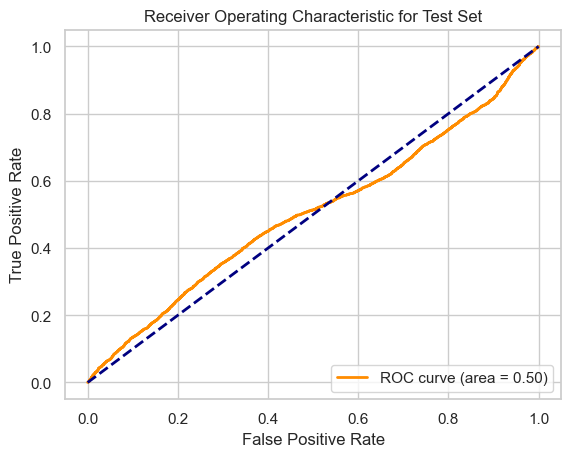

In [40]:
evaluate_model(nb_model, X_train, y_train, X_test_norm, y_test)


# SVM Model Implementation

In this section, we implement a Support Vector Machine (SVM) from scratch to classify individuals based on their income levels. The SVM will be trained using a linear kernel and soft margin approach. We will manually handle the optimization of the SVM's parameters to learn the decision boundary that best separates the two classes in our dataset.


In [41]:
import numpy as np
import random as rnd

class SVM:
    def __init__(self, max_iter=1000, C=1.0, epsilon=0.001):
        self.max_iter = max_iter  # Maximum number of iterations
        self.C = C                # Regularization parameter
        self.epsilon = epsilon    # Convergence criterion
        self.w = None             # Weights
        self.b = 0                # Intercept

    def fit(self, X, y):
        n, d = X.shape
        alpha = np.zeros(n)
        kernel = lambda x, y: np.dot(x, y.T)  # Linear kernel

        for _ in range(self.max_iter):
            alpha_prev = np.copy(alpha)
            for j in range(n):
                i = rnd.randint(0, n - 1)  # Pick a random index
                x_i, x_j, y_i, y_j = X[i], X[j], y[i], y[j]

                # Calculate the kernel
                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                if k_ij == 0:
                    continue

                # Update alpha
                alpha_j_old = alpha[j]
                alpha[j] = alpha_j_old + (y_j * (1 - y_i * y_j * (np.dot(x_i, self.w) + self.b)) / k_ij)
                alpha[j] = max(0, min(self.C, alpha[j]))

                alpha[i] += y_i * y_j * (alpha_j_old - alpha[j])

            # Update weight vector and intercept
            self.w = np.dot(alpha * y, X)
            self.b = np.mean(y - np.dot(X, self.w))

            # Check for convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)



# Support Vector Machine (SVM) Implementation

In this section, we implement a Support Vector Machine (SVM) from scratch. The SVM is a powerful classification technique that works by finding a hyperplane that best divides a dataset into classes. Training and validation are performed using `data_df`, while `test_df` is used to assess the model's performance on unseen data.


In [52]:
import random


class SVM:
    def __init__(self, max_iter=1000, C=1.0, epsilon=0.001):
        self.max_iter = max_iter
        self.C = C
        self.epsilon = epsilon
        self.w = None
        self.b = 0

    def fit(self, X, y):
        n, features = X.shape
        alpha = np.zeros(n)
        self.w = np.zeros(features)

        for _ in range(self.max_iter):
            alpha_prev = np.copy(alpha)
            for j in range(n):
                i = random.randint(0, n-1)
                xi, xj, yi, yj = X[i], X[j], y[i], y[j]

                if np.any(np.isnan(xi)) or np.any(np.isnan(xj)):
                    continue  # Skip iteration if data contains NaN

                kij = np.dot(xi - xj, xi - xj)
                if kij == 0:
                    continue

                eta = 2 * np.dot(xi, xj) - np.dot(xi, xi) - np.dot(xj, xj)
                if eta >= 0:
                    continue

                alpha_j_old = alpha[j]
                alpha[j] -= (yj * (1 - yi * yj * (np.dot(xi, self.w) + self.b)) / kij)
                alpha[j] = min(max(alpha[j], 0), self.C)
                alpha[i] += yi * yj * (alpha_j_old - alpha[j])

            self.w = np.dot(X.T, np.multiply(alpha, y))
            self.b = np.mean(y - np.dot(X, self.w))

            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)


## Data Preparation for SVM

We convert the income labels from {0, 1} to {-1, 1}, which are commonly used in SVM formulations. We then split `data_df` into training and validation sets, while `test_df` is reserved for final evaluation.


In [53]:

data_df_svm = data_df
test_df_svm = test_df
# Convert labels: 0 to -1, 1 remains 1
y_data = np.where(data_df_svm['income'] == 0, -1, 1)
y_test = np.where(test_df_svm['income'] == 0, -1, 1)

# Split data_df into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data_df.drop('income', axis=1), y_data, test_size=0.2, random_state=42)

# Assign test set from test_df
X_test = test_df.drop('income', axis=1)


## Training and Validating the SVM

The SVM is trained on the training set, and its performance is validated on the validation set. We use accuracy to measure the performance and additionally plot the confusion matrix to visualize the classification results.


In [57]:

# Convert X_train and y_train to numpy arrays if they're pandas DataFrames
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
X_test = np.array(X_test)


svm = SVM(max_iter=1000, C=1.0, epsilon=0.001)
svm.fit(X_train, y_train)

# Predictions
y_pred_train = svm.predict(X_train)
y_pred_val = svm.predict(X_val)
y_pred_test = svm.predict(X_test)

# Accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_val, y_pred_val)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {train_accuracy:.2%}')
print(f'Validation Accuracy: {val_accuracy:.2%}')
print(f'Test Accuracy: {test_accuracy:.2%}')

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


TypeError: can't multiply sequence by non-int of type 'float'